In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [2]:
# Load dataset
from sklearn.datasets import load_iris

X, y = load_iris(as_frame=True, return_X_y=True)
target_trans_dict = {i: name for i, name in enumerate(load_iris().target_names)}

full_dataset = X.copy()
full_dataset['species_int'] = y
full_dataset['species'] = [target_trans_dict[target] for target in y]
full_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_int,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


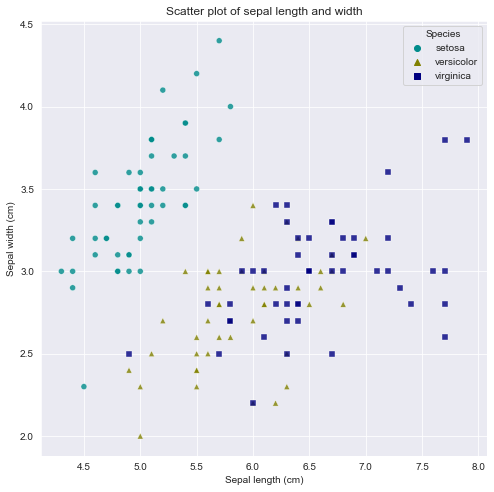

In [3]:
# Create a scatter plot of sepal length and sepal width

# Set grid style for Seaborn plots
sns.set_style('darkgrid')

mycolors = ['darkcyan', 'olive', 'navy']
mymarkers = ['o','^','s']

fig, ax = plt.subplots(figsize=(8, 8))

scatter = sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', \
                          data=full_dataset, hue='species', style='species', \
                          palette=mycolors, markers=mymarkers, alpha=0.8)
scatter.set_title('Scatter plot of sepal length and width')
scatter.set_xlabel('Sepal length (cm)')
scatter.set_ylabel('Sepal width (cm)')
plt.legend(title='Species')

/var/folders/97/gvbt0r7n18s10_q67fnsvz740000gp/T/ipykernel_59364/2741951268.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


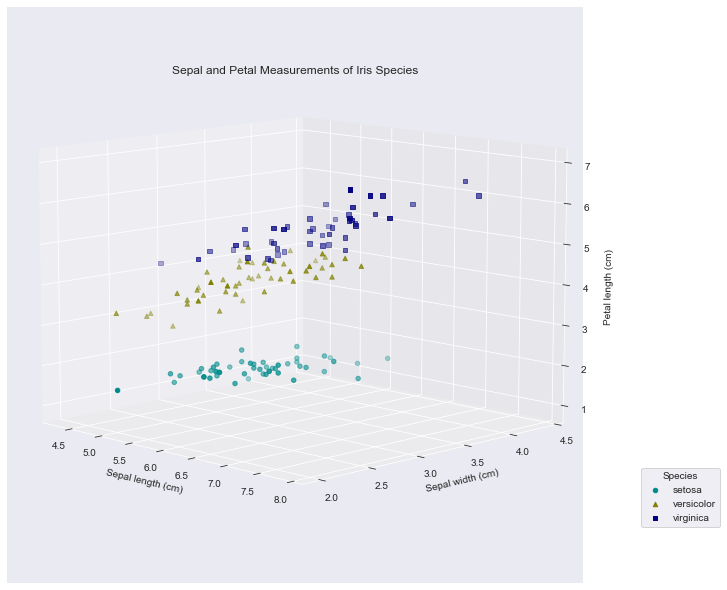

In [4]:
# Create a 3D scatter plot of the sepal width, sepal length and petal length

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

# For each species, plot measurements on 3D axis
for i in full_dataset.species_int.unique():
    data = full_dataset.loc[full_dataset['species_int']==i]
    xs = data['sepal length (cm)']
    ys = data['sepal width (cm)']
    zs = data['petal length (cm)']
    ax.scatter(xs, ys, zs, 
               c=mycolors[i], 
               marker=mymarkers[i],
               label=''.join(u for u in data['species'].unique() if u not in ("[", "]", "'")),)
    
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_zlabel('Petal length (cm)')
plt.title('Sepal and Petal Measurements of Iris Species', x=0.5, y=0.95) 
plt.legend(bbox_to_anchor=(1.1, 0.2), loc='upper left', \
           borderaxespad=0, title='Species')

ax.view_init(elev=10., azim=315) # played about with a few rotations; this one showed it well

# Even though the 2d plot of the sepal measurements showed a lot of overlap between versicolor and virginica, 
# the petal length offers a way of distinguishing them, which we can see in the 3d plot

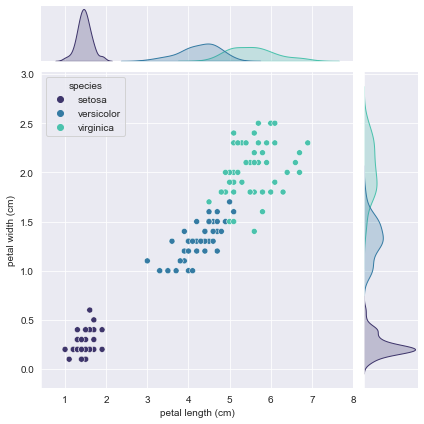

In [5]:
# Use Seaborn to visualize joint distributions between sepal and petal properties
sns.jointplot(data=full_dataset, x='petal length (cm)', \
              y='petal width (cm)', palette='mako', hue='species')

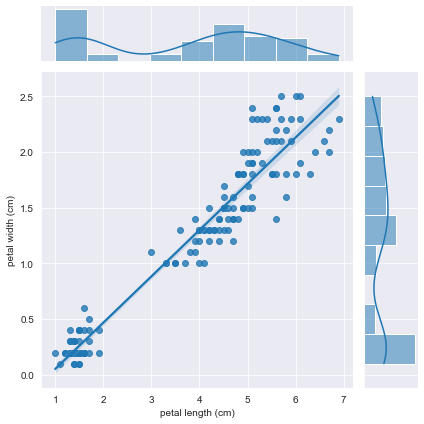

In [6]:
# Add a regression line
sns.jointplot(data=full_dataset, x='petal length (cm)', \
              y='petal width (cm)', palette='mako', kind='reg')

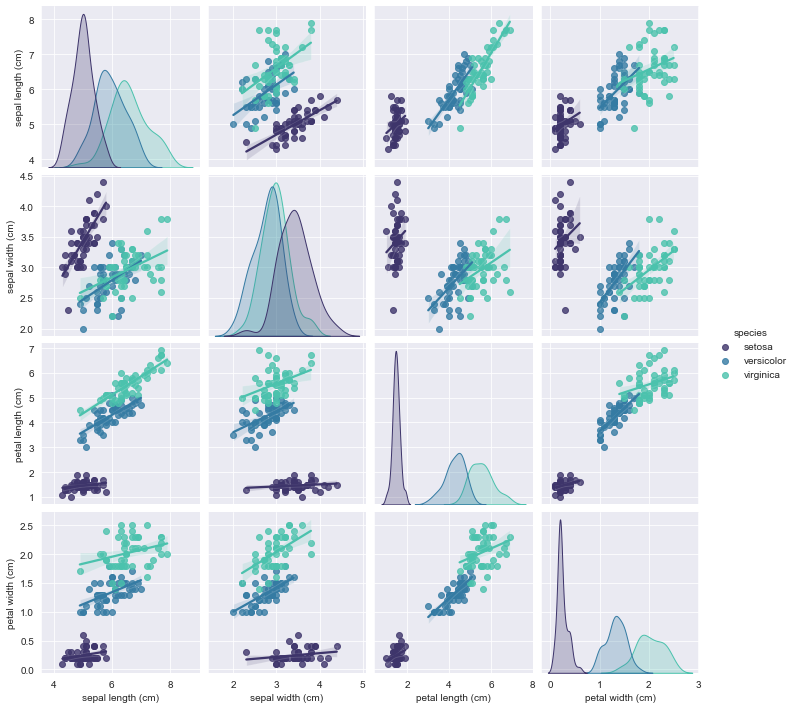

In [7]:
# Use Seaborn's pairplot() function to plot all the dimensions at once.
sns.pairplot(data=full_dataset.drop('species_int', axis=1), palette='mako', \
             hue='species', kind='reg', diag_kind='kde')